# **Simple Linear Regression**

**SANDESH BHAT** - **Data Science and Business Analytics**





**Task #1**










**Prediction using Supervised ML**

Predict the percentage of a student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

---


# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [ ]:
path = 'http://bit.ly/w-data'
dataframe = pd.read_csv(path)

In [ ]:
dataframe.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Barplot of the given data**

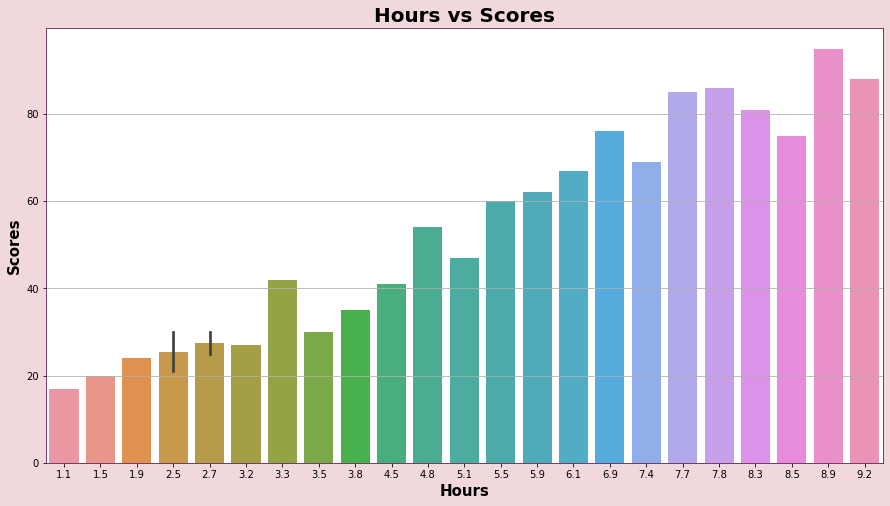

In [ ]:
# to modify the length and width of the graph
plt.figure(figsize=(15,8))
# context manager to give a facecolor and axes color
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#F1D8DD'})
plt.grid(True)

plt.title("Hours vs Scores", fontweight = 'bold', fontsize = 20)
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("", fontsize = 15, fontweight = 'bold')

sns.barplot(x = 'Hours',y = 'Scores',data = dataframe)
plt.show()

From the above bar graph as the number of hours per day increases according to the trend the score also increases.

# Taking care of Missing data

In [ ]:
dataframe.isnull().sum()

Hours     0
Scores    0
dtype: int64

**No missing data**



In [ ]:
# To generate descriptive statistics.
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# to check the datatypes
dataframe.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
# to randomize the dataset
dataframe = dataframe.sample(n=len(dataframe), random_state=0)
dataframe.head()

,Hours,Scores
5,1.5,20
2,3.2,27
19,7.4,69
16,2.5,30
11,5.9,62


To assign Dependent and Independent variables

In [ ]:
X = dataframe.iloc[: , :1].values   #Independent variable
y = dataframe.iloc[:, -1].values    #Dependent Variable

In [ ]:
X,y

(array([[1.5],
        [3.2],
        [7.4],
        [2.5],
        [5.9],
        [3.8],
        [1.9],
        [7.8],
        [6.9],
        [1.1],
        [5.1],
        [7.7],
        [3.3],
        [8.3],
        [9.2],
        [6.1],
        [3.5],
        [2.7],
        [5.5],
        [2.7],
        [8.5],
        [2.5],
        [4.8],
        [8.9],
        [4.5]]),
 array([20, 27, 69, 30, 62, 35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30,
        25, 60, 30, 75, 21, 54, 95, 41]))

# **Training the model**

The entire dataset is used to train the model considering the size of the dataset

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predicting Values**

In [ ]:
y_pred = regressor.predict(X)

In [ ]:
# Creates a dataframe with actual scores and the predicted scores
predDataframe = pd.DataFrame({"Actual Scores" : dataframe["Scores"], "Predicted Scores" : y_pred})
predDataframe.head()

,Actual Scores,Predicted Scores
5,20,17.147378
2,27,33.766244
19,69,74.824618
16,30,26.923182
11,62,60.160913


In [ ]:
print("If a student studie for 9.25 hours then the predicted score obtained by that student is ",regressor.predict([[9.25]]))

If a student studie for 9.25 hours then the predicted score obtained by that student is  [92.90985477]


# **Visualization**

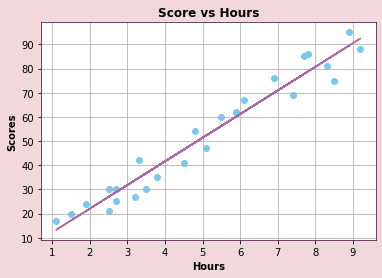

In [ ]:
plt.scatter(X, y, c = '#7CC7EC')
plt.plot(X, y_pred, c = '#A96BA8')
plt.grid(True)
plt.title('Score vs Hours', fontweight = 'bold')
plt.xlabel('Hours', fontweight = 'bold')
plt.ylabel('Scores', fontweight = 'bold')
plt.show()

**Scatter plot of actual vs predicted graph**

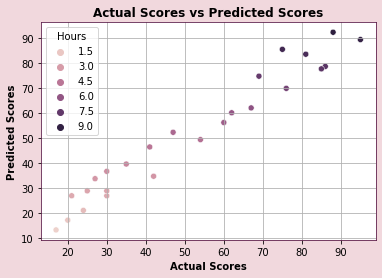

In [ ]:
predDataframe['Hours'] = dataframe['Hours']
plt.title("Actual Scores vs Predicted Scores",fontweight = 'bold')
plt.xlabel("",fontweight = 'bold')
plt.ylabel("",fontweight = 'bold')
sns.scatterplot(x = 'Actual Scores',y = 'Predicted Scores', hue = 'Hours',data = predDataframe)
plt.grid(True)
plt.show()

# **Evaluate the model**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
f'r2 Score = ',r2_score(y_pred,y),'Mean Absolute Error', mean_absolute_error(y_pred,y)

('r2 Score = ', 0.9506250148245328, 'Mean Absolute Error', 4.972805319866374)